In [ ]:
# to do:
# look at projection in each subspace
# Energy in each subspace

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

from simplicial_kuramoto.frustration_scan import *

In [210]:
def Null_Space_Plot(Gsc,graph,pos,savename=None):

    KerL1=sc.linalg.null_space(Gsc.L1.todense())

#     print(KerL1)
    for i in range(KerL1.shape[1]):
        plt.figure()
        nx.draw_networkx_nodes(graph, pos=pos, node_size=5)
        nx.draw_networkx_edges(
                graph,
                pos=pos,
                edge_color=KerL1[:,i],
                edge_cmap=plt.get_cmap("bwr"),
                width=5,
                edge_vmin=np.min(KerL1[:,i]),
                edge_vmax=np.max(KerL1[:,i]),
            )
        plt.title('Null space of L1, vector '+str(i))
        if(savename):
            plt.savefig(savename+'_Ker_'+str(i)+'.pdf',format='pdf')
        plt.show()
        

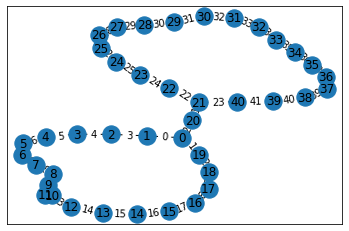

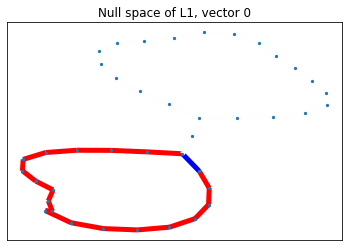

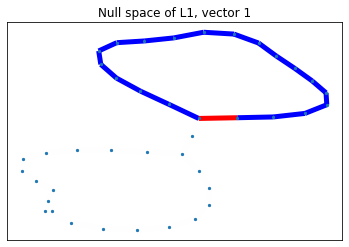

In [322]:
hole_size=10
bridge_size=1

savename='./results/Barbell'+'_'+str(hole_size)+'_'+str(bridge_size)

G=nx.Graph()

for i in range(hole_size-1):
    G.add_edge(i,i+1,weight=1,edge_com=0)
G.add_edge(0,i+1,weight=1,edge_com=0)

Ntemp=len(G.nodes())
G.add_edge(Ntemp+1,0,weight=1,edge_com=0)
for i in range(bridge_size):
    G.add_edge(Ntemp+i+1,Ntemp+i+2,weight=1,edge_com=0)

Ntemp=len(G.nodes())
for i in range(hole_size-1):
    G.add_edge(Ntemp+i,Ntemp+i+1,weight=1,edge_com=0)
G.add_edge(Ntemp,Ntemp+i+1,weight=1,edge_com=0)

Gsc=SimplicialComplex(graph=G, no_faces=False)

pos = nx.spring_layout(G,)
plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G,pos=pos)

# plt.savefig(savename+'.pdf',format='pdf')

Null_Space_Plot(Gsc,G,pos,savename)

alpha_2= 0.0
alpha_2= 0.3
alpha_2= 0.45
alpha_2= 0.5
alpha_2= 0.7
alpha_2= 1.0
alpha_2= 1.4
alpha_2= 1.5


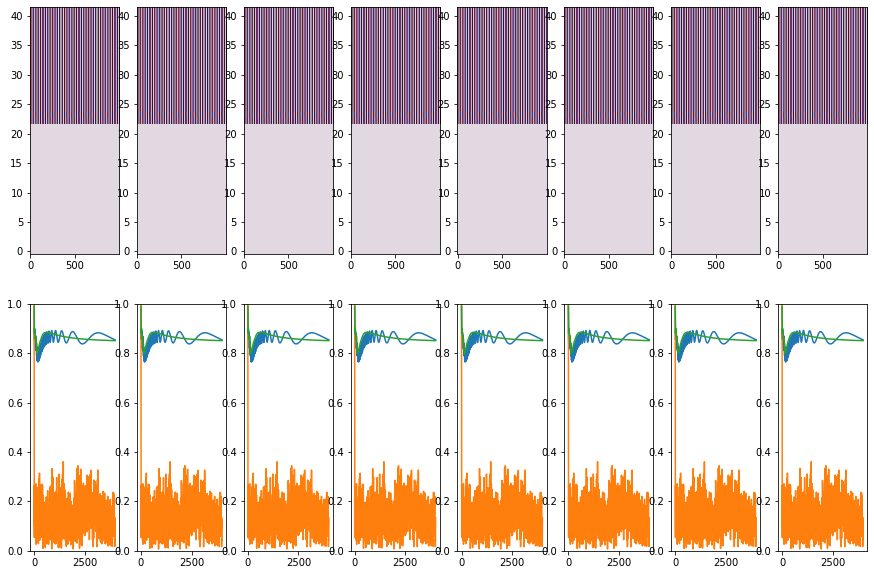

In [323]:
initial_phase = np.random.random(Gsc.n_edges)
grad_subspace, curl_subspace, harm_subspace = get_subspaces(Gsc)

# alpha1 = np.linspace(0,np.pi, 2)
alpha_1 = 1.0
alpha2 = np.linspace(0, np.pi, 5)
n_repeats = 1
t_max = 4000
n_t = 1000
n_min = 0

alpha_2_val=[0.0, 0.3, 0.45, 0.5, 0.7, 1.0, 1.4, 1.5]
# plt.figure(figsize=(4, 3))
fig, axs = plt.subplots(2,len(alpha_2_val),figsize=(15,10))

for i,alpha_2 in enumerate(alpha_2_val):
    print('alpha_2=', alpha_2)
    res = integrate_edge_kuramoto(
        Gsc,
        harm_subspace[:, 1],
        t_max,
        n_t,
        alpha_1=alpha_1 * harm_subspace[:, 1],
        alpha_2=alpha_2,
    )
    result = res.y[:, n_min:]
    time = res.t[n_min:]

    axs[0,i].imshow(mod(result),origin="lower",aspect="auto",cmap="twilight_shifted",interpolation="nearest")
    global_order, partial_orders = compute_simplicial_order_parameter(result, harm_subspace)
    axs[1,i].plot(time, global_order, label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
    axs[1,i].plot(time, partial_orders[0], label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
    axs[1,i].plot(time, partial_orders[1], label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
#     plt.savefig(savename+'_OP.pdf')

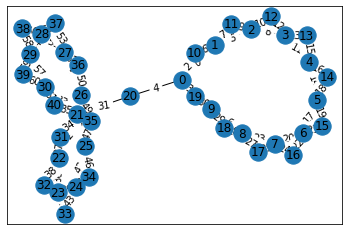

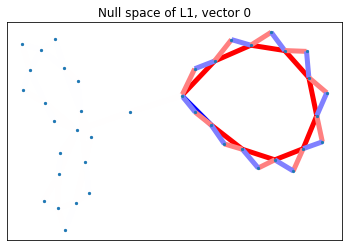

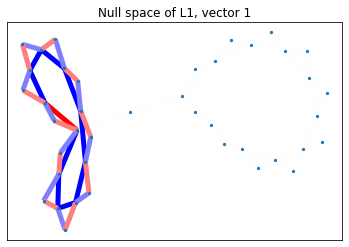

In [330]:
hole_size=10
bridge_size=1

savename='./results/flower'+'_'+str(hole_size)+'_'+str(bridge_size)

G=nx.Graph()

for i in range(hole_size-1):
    G.add_edge(i,i+1,weight=1,edge_com=0)
G.add_edge(0,i+1,weight=1,edge_com=0)

for i in range(hole_size-1):
    G.add_edge(hole_size+i,i,weight=1,edge_com=0)
    G.add_edge(hole_size+i,i+1,weight=1,edge_com=0)
G.add_edge(hole_size-1,hole_size+i+1,weight=1,edge_com=0)
G.add_edge(0,hole_size+i+1,weight=1,edge_com=0)

Ntemp=len(G.nodes())
G.add_edge(Ntemp+1,0,weight=1,edge_com=0)
for i in range(bridge_size):
    G.add_edge(Ntemp+i+1,Ntemp+i+2,weight=1,edge_com=0)

Ntemp=len(G.nodes())
for i in range(hole_size-1):
    G.add_edge(Ntemp+i,Ntemp+i+1,weight=1,edge_com=0)
G.add_edge(Ntemp,Ntemp+i+1,weight=1,edge_com=0)

for i in range(hole_size-1):
    G.add_edge(Ntemp+hole_size+i,Ntemp+i,weight=1,edge_com=0)
    G.add_edge(Ntemp+hole_size+i,Ntemp+i+1,weight=1,edge_com=0)
G.add_edge(Ntemp+hole_size-1,Ntemp+hole_size+i+1,weight=1,edge_com=0)
G.add_edge(Ntemp,Ntemp+hole_size+i+1,weight=1,edge_com=0)

Gsc=SimplicialComplex(graph=G, no_faces=False)

pos = nx.spring_layout(G,)
plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G,pos=pos)

# plt.savefig(savename+'.pdf',format='pdf')

Null_Space_Plot(Gsc,G,pos,savename)

alpha_2= 0.0
alpha_2= 0.3
alpha_2= 0.45
alpha_2= 0.5
alpha_2= 0.7
alpha_2= 1.0
alpha_2= 1.4
alpha_2= 1.5


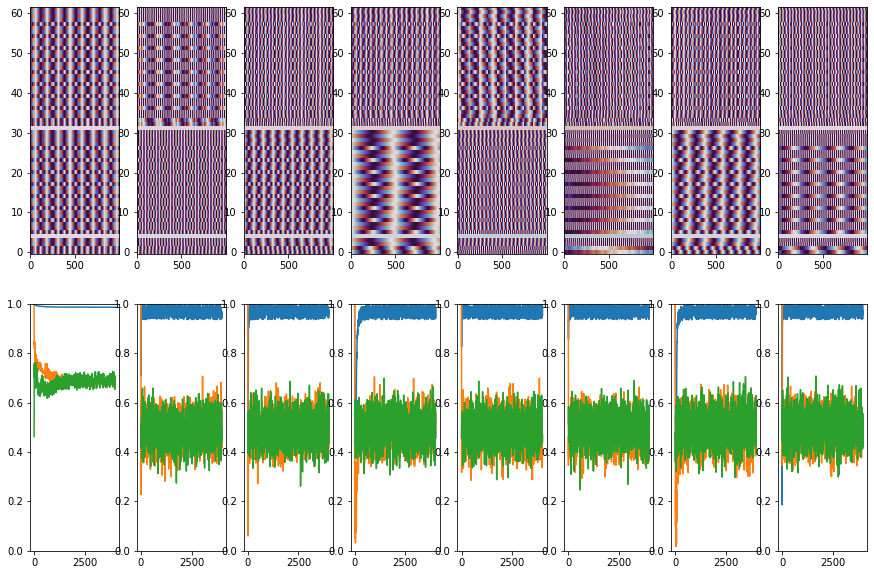

In [331]:
initial_phase = np.random.random(Gsc.n_edges)
grad_subspace, curl_subspace, harm_subspace = get_subspaces(Gsc)

# alpha1 = np.linspace(0,np.pi, 2)
alpha_1 = 1.0
alpha2 = np.linspace(0, np.pi, 5)
n_repeats = 1
t_max = 4000
n_t = 1000
n_min = 0

alpha_2_val=[0.0, 0.3, 0.45, 0.5, 0.7, 1.0, 1.4, 1.5]
# plt.figure(figsize=(4, 3))
fig, axs = plt.subplots(2,len(alpha_2_val),figsize=(15,10))

for i,alpha_2 in enumerate(alpha_2_val):
    print('alpha_2=', alpha_2)
    res = integrate_edge_kuramoto(
        Gsc,
        harm_subspace[:, 0],
        t_max,
        n_t,
        alpha_1=alpha_1 * (harm_subspace[:, 1]+harm_subspace[:, 0]),
        alpha_2=alpha_2,
    )
    result = res.y[:, n_min:]
    time = res.t[n_min:]

    axs[0,i].imshow(mod(result),origin="lower",aspect="auto",cmap="twilight_shifted",interpolation="nearest")
    global_order, partial_orders = compute_simplicial_order_parameter(result, harm_subspace)
    axs[1,i].plot(time, global_order, label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
    axs[1,i].plot(time, partial_orders[0], label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
    axs[1,i].plot(time, partial_orders[1], label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
    plt.savefig(savename+'_OP.pdf')

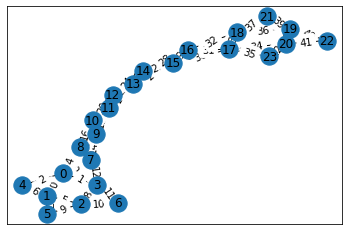

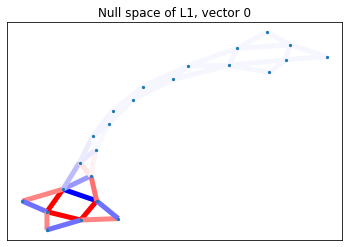

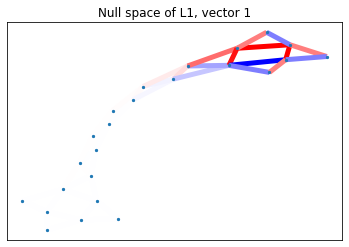

In [293]:
#plot harmonics, real flower

hole_size=4
bridge_size=10

savename='./results/flower_triangle'+'_'+str(hole_size)+'_'+str(bridge_size)

G=nx.Graph()

for i in range(hole_size-1):
    G.add_edge(i,i+1,weight=1,edge_com=0)
G.add_edge(0,i+1,weight=1,edge_com=0)

for i in range(hole_size-1):
    G.add_edge(hole_size+i,i,weight=1,edge_com=0)
    G.add_edge(hole_size+i,i+1,weight=1,edge_com=0)
G.add_edge(hole_size-1,hole_size+i+1,weight=1,edge_com=0)
G.add_edge(0,hole_size+i+1,weight=1,edge_com=0)

Ntemp=len(G.nodes())

G.add_edge(Ntemp,Ntemp-1,weight=1,edge_com=0)
G.add_edge(0,Ntemp,weight=1,edge_com=0)
for i in range(bridge_size):
    G.add_edge(Ntemp+i,Ntemp-1+i+2,weight=1,edge_com=0)
    G.add_edge(Ntemp-1+i+2,Ntemp+i-1,weight=1,edge_com=0)

Ntemp=len(G.nodes())-2
for i in range(hole_size-1):
    G.add_edge(Ntemp+i,Ntemp+i+1,weight=1,edge_com=0)
G.add_edge(Ntemp,Ntemp+i+1,weight=1,edge_com=0)

Ntemp+=1
for i in range(hole_size-2):
#     print(Ntemp+hole_size+i,Ntemp+i)
    G.add_edge(Ntemp+hole_size+i,Ntemp+i,weight=1,edge_com=0)
    G.add_edge(Ntemp+hole_size+i,Ntemp+i+1,weight=1,edge_com=0)
G.add_edge(Ntemp-1,Ntemp+hole_size+i+1,weight=1,edge_com=0)
G.add_edge(Ntemp+hole_size-2,Ntemp+hole_size+i+1,weight=1,edge_com=0)

Gsc=SimplicialComplex(graph=G, no_faces=False)

pos = nx.spring_layout(G,)
plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G,pos=pos)

plt.savefig(savename+'.pdf',format='pdf')

Null_Space_Plot(Gsc,G,pos,savename)

alpha_2= 0.0
alpha_2= 0.3
alpha_2= 0.45
alpha_2= 0.5
alpha_2= 0.7
alpha_2= 1.0
alpha_2= 1.4
alpha_2= 1.5


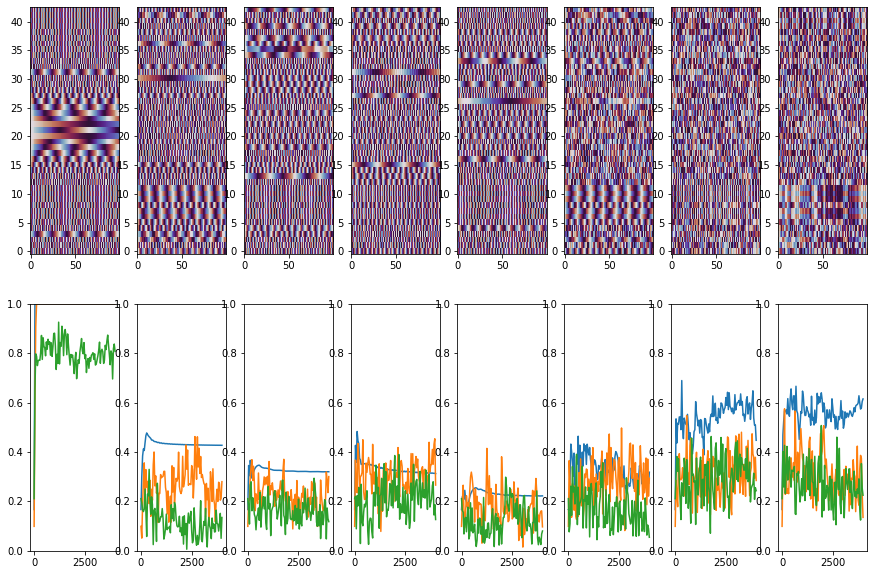

In [294]:
initial_phase = np.random.random(Gsc.n_edges)
grad_subspace, curl_subspace, harm_subspace = get_subspaces(Gsc)

# alpha1 = np.linspace(0,np.pi, 2)
alpha_1 = 1.0
alpha2 = np.linspace(0, np.pi, 5)
n_repeats = 1
t_max = 4000
n_t = 100
n_min = 0

alpha_2_val=[0.0, 0.3, 0.45, 0.5, 0.7, 1.0, 1.4, 1.5]
# plt.figure(figsize=(4, 3))
fig, axs = plt.subplots(2,len(alpha_2_val),figsize=(15,10))

for i,alpha_2 in enumerate(alpha_2_val):
    print('alpha_2=', alpha_2)
    res = integrate_edge_kuramoto(
        Gsc,
        initial_phase,
        t_max,
        n_t,
        alpha_1=alpha_1 * (harm_subspace[:, 1]+harm_subspace[:, 0]),
        alpha_2=alpha_2,
    )
    result = res.y[:, n_min:]
    time = res.t[n_min:]

    axs[0,i].imshow(mod(result),origin="lower",aspect="auto",cmap="twilight_shifted",interpolation="nearest")
    global_order, partial_orders = compute_simplicial_order_parameter(result, harm_subspace)
    axs[1,i].plot(time, global_order, label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
    axs[1,i].plot(time, partial_orders[0], label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
    axs[1,i].plot(time, partial_orders[1], label=f"alpha_2 = {alpha_2}")
    axs[1,i].set_ylim([0, 1])
    plt.savefig(savename+'_OP.pdf')

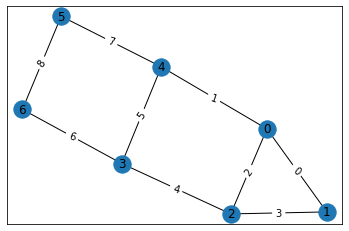

In [119]:
#plot harmonics, real flower
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,4,weight=1,edge_com=0)
G.add_edge(4,0,weight=1,edge_com=0)
G.add_edge(4,5,weight=1,edge_com=0)
G.add_edge(5,6,weight=1,edge_com=0)
G.add_edge(6,3,weight=1,edge_com=0)
# G.add_edge(5,0,weight=1,edge_com=0)

G.add_edge(2,0,weight=1,edge_com=0)

Gsc=SimplicialComplex(graph=G, no_faces=False)

pos = nx.spring_layout(G,)
plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G,pos=pos)

In [120]:
alpha1 = 1
alpha2 = np.linspace(0, np.pi, 2)
n_repeats = 1

scan_frustration_parameters(
        Gsc,
        filename="flower.pkl",
        alpha1=alpha1 *harm_subspace[:, 0],
        alpha2=alpha2,
        repeats=n_repeats,
        n_workers=2,
    )

100%|██████████| 14/14 [00:04<00:00,  3.32it/s]


[[  message: 'The solver successfully reached the end of the integration interval.'
       nfev: 676
       njev: 2
        nlu: 47
        sol: None
     status: 0
    success: True
          t: array([  0.        ,   0.2002002 ,   0.4004004 ,   0.6006006 ,
           0.8008008 ,   1.001001  ,   1.2012012 ,   1.4014014 ,
           1.6016016 ,   1.8018018 ,   2.002002  ,   2.2022022 ,
           2.4024024 ,   2.6026026 ,   2.8028028 ,   3.003003  ,
           3.2032032 ,   3.4034034 ,   3.6036036 ,   3.8038038 ,
           4.004004  ,   4.2042042 ,   4.4044044 ,   4.6046046 ,
           4.8048048 ,   5.00500501,   5.20520521,   5.40540541,
           5.60560561,   5.80580581,   6.00600601,   6.20620621,
           6.40640641,   6.60660661,   6.80680681,   7.00700701,
           7.20720721,   7.40740741,   7.60760761,   7.80780781,
           8.00800801,   8.20820821,   8.40840841,   8.60860861,
           8.80880881,   9.00900901,   9.20920921,   9.40940941,
           9.60960961,   9

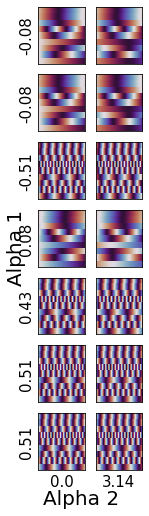

In [121]:
folder = "./results/"

path = folder + "flower.pkl"
filename = "flower.pdf"
plot_phases(path, filename)

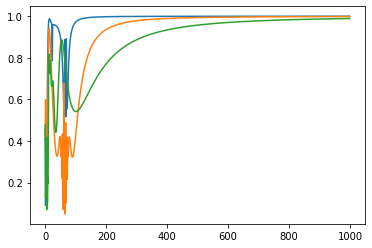

In [122]:
Gsc, results, alpha1, alpha2 = pickle.load(open(path, "rb"))
grad_subspace, curl_subspace, harm_subspace = get_subspaces(Gsc)
result = results[6][0].y

global_order, partial_orders = compute_simplicial_order_parameter(result, harm_subspace)

plt.figure()
plt.plot(global_order, label=f"alpha_2 = {alpha_2}")
plt.plot(partial_orders[0], label=f"alpha_2 = {alpha_2}")
plt.plot(partial_orders[1], label=f"alpha_2 = {alpha_2}")